In [ ]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

# **Question 1 - Extracting Tesla Stock Data Using yfinance**

In [48]:
import yfinance as yf
import pandas as pd
import requests
!pip install lxml
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [46]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
tesla_history = tesla.history(period="15y")  # Retrieve 15 year of historical data


In [102]:
top_5 = tesla_history.head()  # Get the top 5 rows
print("First 5 days of data")
print(top_5)


First 5 days of data
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


# **Question 2 - Extracting Tesla Revenue Data Using Webscraping**

In [62]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text
# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'
# Step 4: Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Step 5: Find the relevant table (assuming it's the second one, as you mentioned)
tables = soup.find_all("table")
revenue_table = tables[1]  # Index 1 for the Tesla Revenue table
# Step 6: Check for the Tesla Quarterly Revenue Table
# Now we can iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Use pd.concat to append data
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)
# Step 7: Clean the Revenue column to remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
# Step 8: Remove null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
# Step 9: Display the last five rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

<>:33: SyntaxWarning: invalid escape sequence '\$'
<>:33: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rhodri.owens\AppData\Local\Temp\ipykernel_12908\438128921.py:33: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


Question 3




# ** Question 3 Use yfinance to Extract Stock Data**

In [106]:
import yfinance as yf
# ticker symbol of GameStop is GME
gamestop = yf.Ticker('GME')

# extracting stock information
gme_data = gamestop.history(period='25y')

# reset the index
gme_data.reset_index(inplace=True)
print(gme_data)

# Get the top 5 rows
top_5 = gme_data.head()
print("First 5 days of data")



                          Date       Open       High        Low      Close  \
0    2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691667   
1    2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683251   
2    2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658002   1.674834   
3    2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
4    2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                        ...        ...        ...        ...        ...   
5711 2024-10-22 00:00:00-04:00  20.620001  20.940001  20.430000  20.930000   
5712 2024-10-23 00:00:00-04:00  20.730000  20.980000  20.350000  20.540001   
5713 2024-10-24 00:00:00-04:00  20.629999  20.840000  20.480000  20.629999   
5714 2024-10-25 00:00:00-04:00  20.650000  21.430000  20.540001  20.570000   
5715 2024-10-28 00:00:00-04:00  20.840000  22.770000  20.730000  22.730000   

        Volume  Dividends  Stock Splits  
0     76216000       

# ** Question 4 Use Webscraping to Extract GME Revenue Data**


In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
# Step 2: Save the text of the response as a variable named html_data
html_data = response.text
# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'
# Step 4: Create an empty DataFrame
Game_Stop_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Step 5: Find the relevant table (assuming it's the second one, as you mentioned)
tables = soup.find_all("table")
revenue_table = tables[1]  # Index 1 for the Game Stop Revenue
# Step 6: Check for the Game Stop Quarterly Revenue Table
# Now we can iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Use pd.concat to append data
        Game_Stop_revenue = pd.concat([Game_Stop_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)
# Step 7: Clean the Revenue column to remove commas and dollar signs
Game_Stop_revenue["Revenue"] = Game_Stop_revenue['Revenue'].str.replace(r',|\$', "", regex=True)
# Step 8: Remove null or empty strings in the Revenue column
Game_Stop_revenue = Game_Stop_revenue[Game_Stop_revenue['Revenue'] != ""]
# Step 9: 
print(Game_Stop_revenue)

          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]



Question 5 Tesla stock and revenue

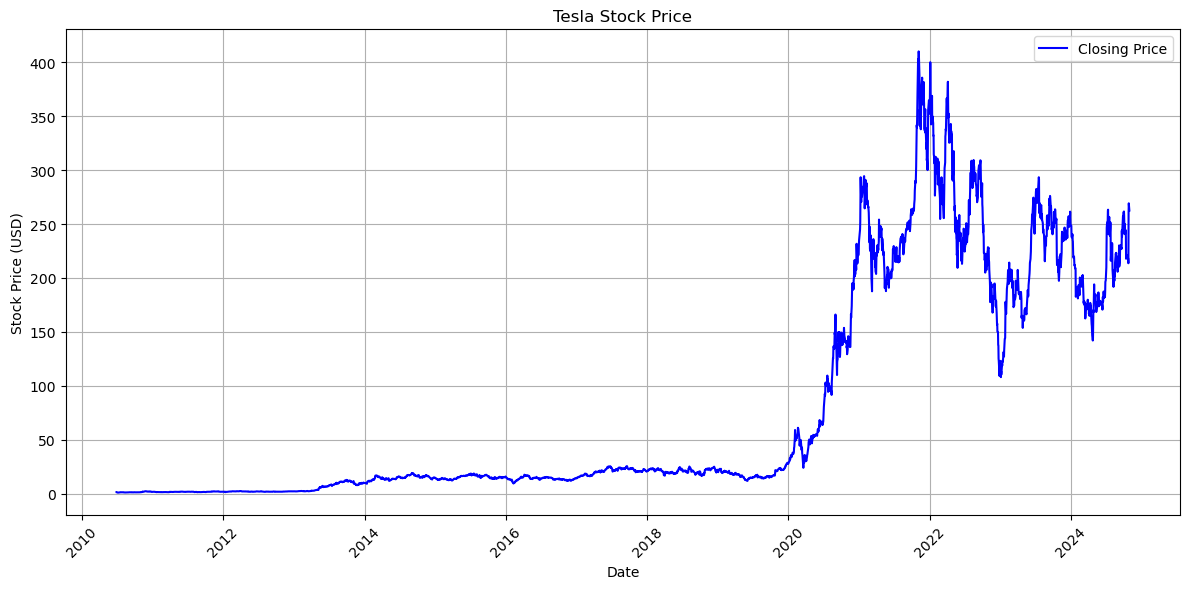

In [108]:
import matplotlib.pyplot as plt
# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="15y")  # Get data for the past year
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(tesla_data.index, tesla_data["Close"], label="Closing Price", color='b')
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\$'
<>:33: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rhodri.owens\AppData\Local\Temp\ipykernel_12908\1468764142.py:33: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


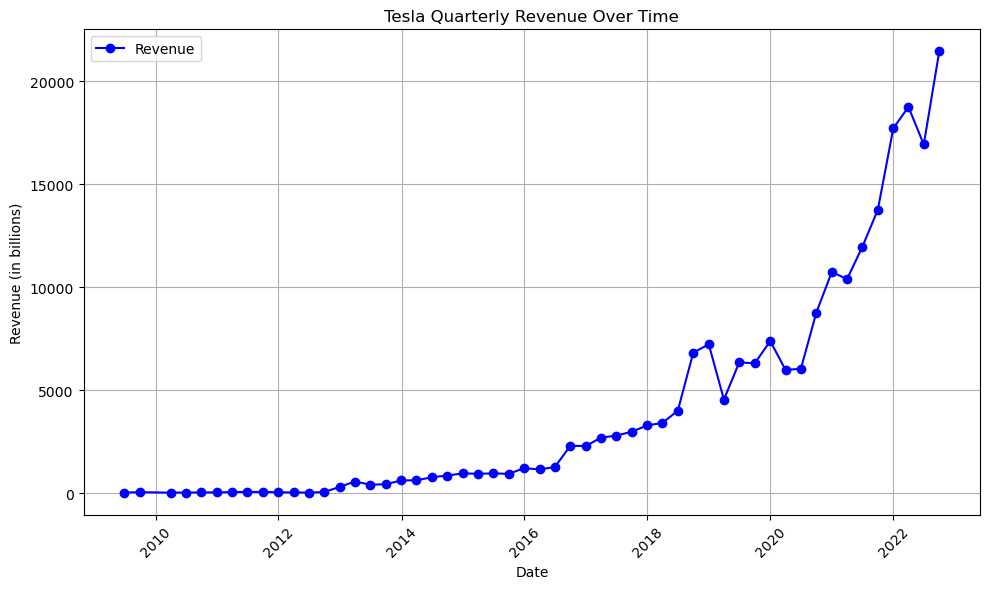

In [13]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text

# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'

# Step 4: Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Find the relevant table (assuming it's the second one, as you mentioned)
tables = soup.find_all("table")
revenue_table = tables[1]  # Index 1 for the Tesla Revenue table

# Step 6: Iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Append data to DataFrame
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)

# Step 7: Clean the Revenue column to remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Step 8: Convert Revenue to numeric and sort by Date
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], errors='coerce')
tesla_revenue.dropna(inplace=True)  # Drop any rows where conversion failed
tesla_revenue.sort_values("Date", inplace=True)

# Step 9: Plot the revenue over time
plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], marker='o', color='b', label="Revenue")
plt.title("Tesla Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in billions)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#** Question 6 GameStop Stock and Revenue Dashboard**

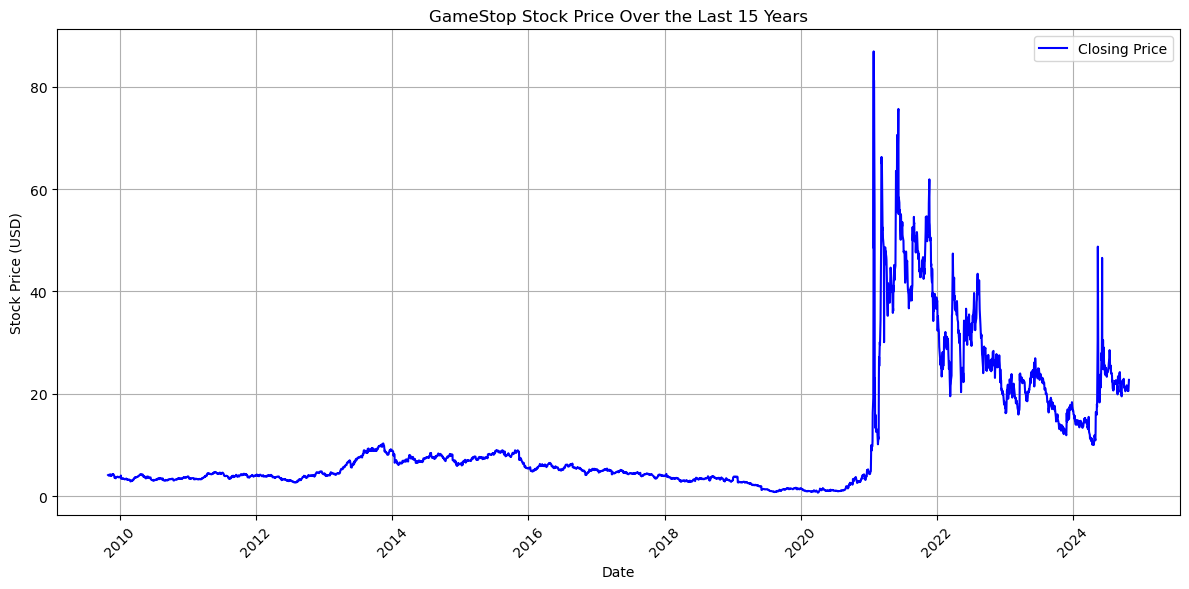

In [56]:
import yfinance as yf
import matplotlib.pyplot as plt
# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="15y")  # Get data for the past 15 years
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index, gme_data["Close"], label="Closing Price", color='b')
plt.title("GameStop Stock Price Over the Last 15 Years")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<>:33: SyntaxWarning: invalid escape sequence '\$'
<>:33: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rhodri.owens\AppData\Local\Temp\ipykernel_17944\1415287447.py:33: SyntaxWarning: invalid escape sequence '\$'
  gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$', "", regex=True)


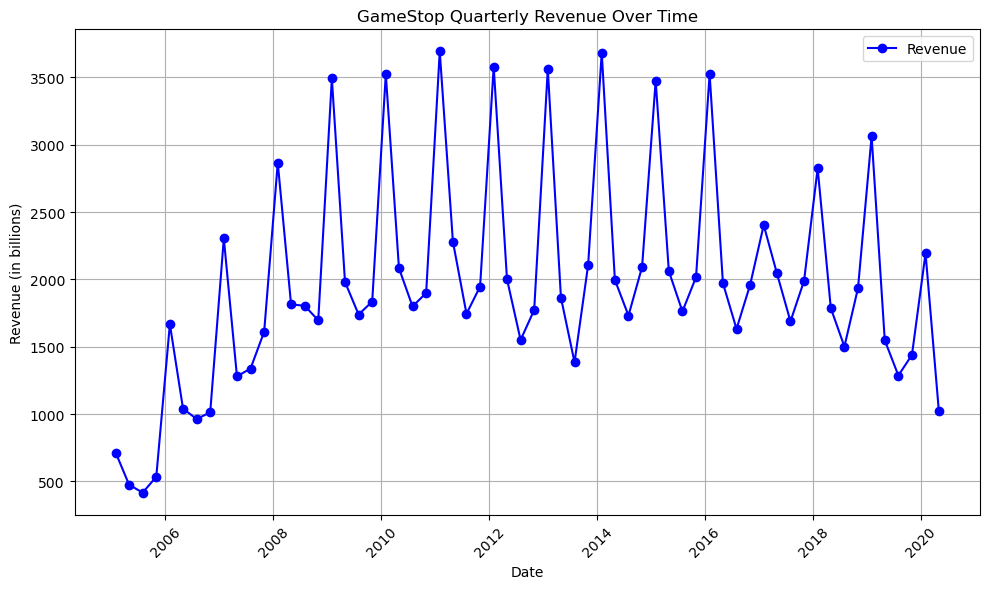

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text

# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'

# Step 4: Create an empty DataFrame
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Find the relevant table (assuming it's the second one for GameStop revenue)
tables = soup.find_all("table")
revenue_table = tables[1]  # Adjust this index if necessary for GameStop

# Step 6: Iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Append data to DataFrame
        gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)

# Step 7: Clean the Revenue column to remove commas and dollar signs
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Step 8: Convert Revenue to numeric and sort by Date
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors='coerce')
gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"], errors='coerce')
gamestop_revenue.dropna(inplace=True)  # Drop any rows where conversion failed
gamestop_revenue.sort_values("Date", inplace=True)

# Step 9: Plot the revenue over time
plt.figure(figsize=(10, 6))
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], marker='o', color='b', label="Revenue")
plt.title("GameStop Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in billions)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()